In [1]:
from utils import load_data, preprocess_data,reshape_data, preprocess_data2
from train import define_model2, evaluate_model, define_inception_model,define_lstm_model
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold

/Users/joshhuang/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [6]:
fileloc = "/Users/joshhuang/MATLAB/ONR/Localization/"
filename = "35_Locations_1.csv"
df = load_data(fileloc, filename)

In [7]:
#[scaled_data, targets_scaler] = preprocess_data(df)
def split_data(scaled_data, train_ratio=0.6):
    # Extract features and labels for stratified splitting
    features = scaled_data[:, :-2]
    labels = df.iloc[:, -2:]  # assuming D and phi are the last two columns
    
    # Create a single label for stratified splitting
    strat_labels = labels.astype(str).agg('-'.join, axis=1)
    
    # Split the data
    train_indices, test_indices = train_test_split(np.arange(len(features)), test_size=0.4, stratify=strat_labels, random_state=42)
    train = scaled_data[train_indices]
    test = scaled_data[test_indices]
    return train, test

scaled_data = preprocess_data2(df)
train, test = split_data(scaled_data)
train_x, train_y, test_x, test_y = reshape_data(train, test)

## Augmentation

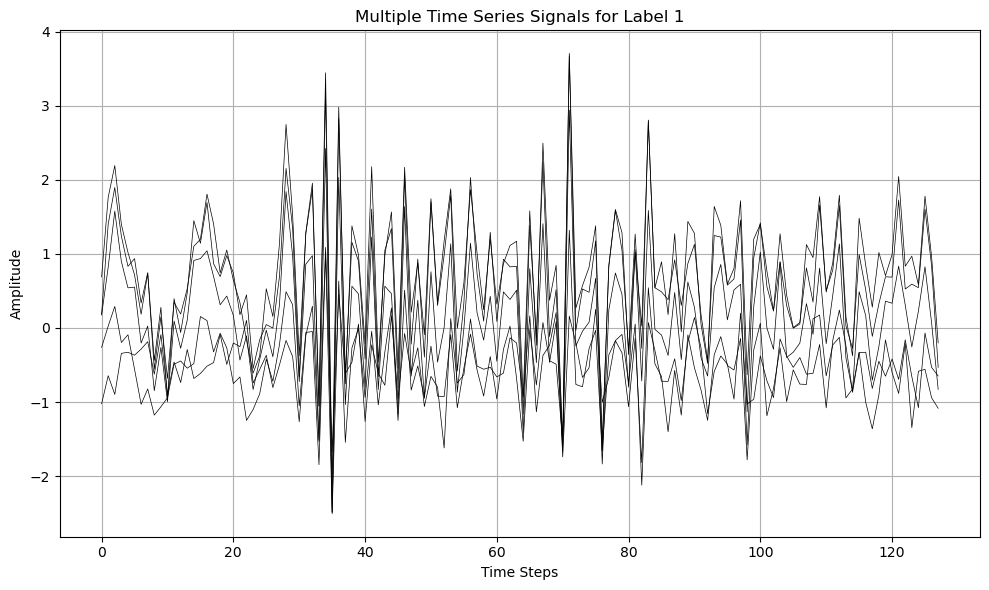

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('TS-GAN/AugSig/Augmented_Training_DCGAN_Epoch_2000.csv', header=None)

# Extract labels and features
labels = data.iloc[:, 0]  # Labels are in the first column
features = data.iloc[:, 1:]  # Time series signals are in the remaining columns

# Filter data for a specific label, e.g., label 1.0
data_label_1 = features[labels == 35.0].to_numpy()

# Decide how many samples you want to plot, for example 5
num_samples_to_plot = 5

# Set up the plot
plt.figure(figsize=(10, 6))

# Check if there are at least as many samples as you want to plot
if data_label_1.shape[0] < num_samples_to_plot:
    num_samples_to_plot = data_label_1.shape[0]  # Adjust number if there are fewer samples available

for i in range(num_samples_to_plot):
    plt.plot(data_label_1[i, :], label=f'Sample {i+1}', color='black', linewidth=0.5, alpha=1)

plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.title('Multiple Time Series Signals for Label 1')
plt.grid(True)
plt.tight_layout()
plt.show()


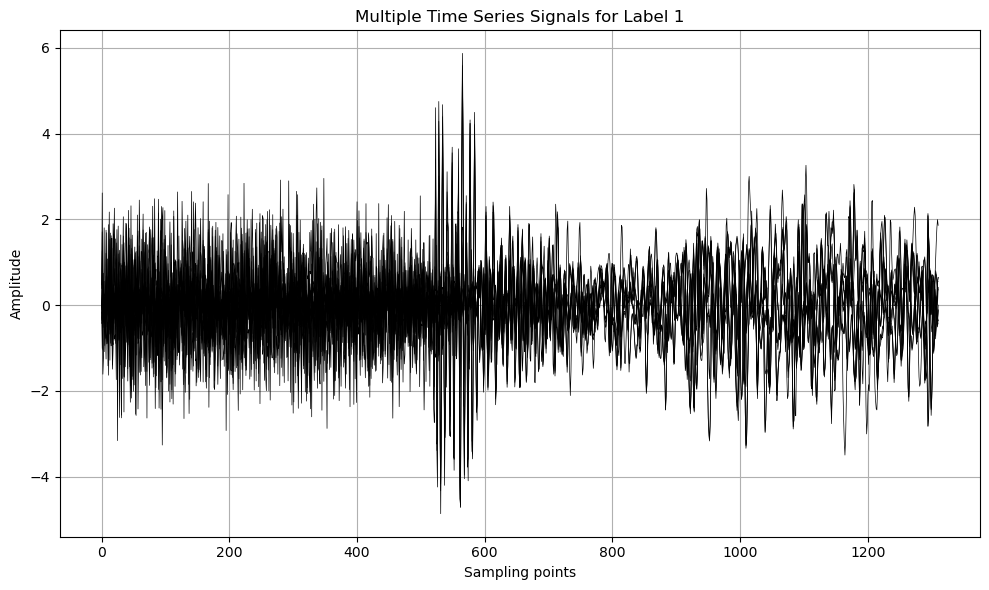

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/joshhuang/PythonFolder/ONR/Hybrid/TS-GAN/Training.csv', header=None)

# Extract labels and features
labels = data.iloc[:, 0]  # Labels are in the first column
features = data.iloc[:, 1:]  # Time series signals are in the remaining columns

# Filter data for a specific label, e.g., label 1.0
data_label_1 = features[labels == 35.0].to_numpy()

# Decide how many samples you want to plot, for example 5
num_samples_to_plot = 50

# Set up the plot
plt.figure(figsize=(10, 6))

# Check if there are at least as many samples as you want to plot
if data_label_1.shape[0] < num_samples_to_plot:
    num_samples_to_plot = data_label_1.shape[0]  # Adjust number if there are fewer samples available

for i in range(num_samples_to_plot):
    plt.plot(data_label_1[i, :], label=f'Sample {i+1}', color='black', linewidth=0.5, alpha=1)

plt.xlabel('Sampling points')
plt.ylabel('Amplitude')
plt.title('Multiple Time Series Signals for Label 1')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Define the mapping from distances and angles to labels
points = np.array([
    [-10, 0], [-8, 0], [-6, 0], [-4, 0], [-2, 0],
    [-10, -2], [-8, -2], [-6, -2], [-4, -2], [-2, -2], [0, -2],
    [-10, -4], [-8, -4], [-6, -4], [-4, -4], [-2, -4], [0, -4],
    [-10, -6], [-8, -6], [-6, -6], [-4, -6], [-2, -6], [0, -6],
    [-10, -8], [-8, -8], [-6, -8], [-4, -8], [-2, -8], [0, -8],
    [-10, -10], [-8, -10], [-6, -10], [-4, -10], [-2, -10], [0, -10]
])
distances = np.sqrt(np.sum(points**2, axis=1))
phis = np.arctan2(points[:, 1], points[:, 0])
fixed_mapping = {tuple([d, phi]): i + 1 for i, (d, phi) in enumerate(zip(distances, phis))}

# Function to convert labels to distances and phis
def labels_to_distance_phi(labels, distances, phis):
    # Labels are assumed to be 1-indexed based on your description
    # Adjust for 0-indexed Python arrays
    distances_phi = [(distances[label-1], phis[label-1]) for label in labels]
    return np.array(distances_phi)

In [ ]:
# Load the original data
data = pd.read_csv('/Users/joshhuang/PythonFolder/ONR/Hybrid/TS-GAN/Training1.csv', header=None).values
# Assuming data is loaded from 'Training.csv'
labels = data[:, 0].astype(int)
train_x = data[:, 1:]
# Map labels back to [distance, phi] pairs using the sorted combinations
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
train_y = labels_to_distance_phi(labels, distances, phis)

In [ ]:
import pandas as pd
import numpy as np
# Load the augmented data
augmented_data = pd.read_csv('TS-GAN/AugSig/Augmented_Training_TSAGAN_Epoch_2000.csv', header=None).values
# Assuming augmented_data is loaded from 'TrainingWithLabels.csv'
augmented_labels = augmented_data[:, 0].astype(int)
augmented_train_x = augmented_data[:, 1:]
# Map labels back to [distance, phi] pairs using the sorted combinations
augmented_train_x = np.reshape(augmented_train_x, (augmented_train_x.shape[0], 1, augmented_train_x.shape[1]))
augmented_train_y = labels_to_distance_phi(augmented_labels, distances, phis)

In [ ]:
model =[]
model =  define_inception_model((1, augmented_train_x.shape[2]))
#model =  define_inception_model((1, train_x.shape[2]))
model.summary()
# Train the model
history = model.fit(augmented_train_x, augmented_train_y, epochs=100, batch_size=64, validation_split=0.2)
#history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt

# Extracting loss and validation loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
predictions = evaluate_model(model, test_x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to convert polar coordinates to Cartesian coordinates
def polar_to_cartesian(d, phi):
    x = d * np.cos(phi)
    y = d * np.sin(phi)
    return x, y

# Reshape predictions to match test_y's shape
predictions_reshaped = predictions.reshape(test_y.shape)
# Extract distances and angles from predictions and actual values
d_pred, phi_pred = predictions_reshaped[:, 0], predictions_reshaped[:, 1]
d_actual, phi_actual = test_y[:, 0], test_y[:, 1]

# Convert to Cartesian coordinates
x_pred, y_pred = polar_to_cartesian(d_pred, phi_pred)
x_actual, y_actual = polar_to_cartesian(d_actual, phi_actual)

# Calculate the Euclidean distance (error) between predicted and actual coordinates
errors = np.sqrt((x_pred - x_actual) ** 2 + (y_pred - y_actual) ** 2)

# Select the sample with the least error for each unique label
unique_labels, unique_indices = np.unique(test_y, axis=0, return_inverse=True)
min_error_indices = []
for label in np.unique(unique_indices):
    label_indices = np.where(unique_indices == label)[0]
    min_error_index = label_indices[np.argmin(errors[label_indices])]
    min_error_indices.append(min_error_index)

# Filter the data to include only the samples with the least error for each label
x_actual_filtered = x_actual[min_error_indices]
y_actual_filtered = y_actual[min_error_indices]
x_pred_filtered = x_pred[min_error_indices]
y_pred_filtered = y_pred[min_error_indices]

# Plotting
# Set global font size
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 8))
plt.scatter(x_actual_filtered, y_actual_filtered, c='black', marker='s', s=100, label='Source', alpha=0.7)
plt.scatter(x_pred_filtered, y_pred_filtered, c='black', marker='*', s=100, label='Est. Src.', alpha=0.7)

# Plot dotted lines to show the gap between actual and predicted locations
for x_a, y_a, x_p, y_p in zip(x_actual_filtered, y_actual_filtered, x_pred_filtered, y_pred_filtered):
    plt.plot([x_a, x_p], [y_a, y_p], 'k--', linewidth=1)  # Solid black line

# Mark the sensor location at (0,0)
plt.scatter(0, 0, c='black', marker='o', s=300, label='Sensor')
plt.xlim(-12, 3)
plt.ylim(-12, 3)


# Set larger labels and legend
plt.title('Actual vs. Predicted Locations', fontsize=18)
plt.xlabel('X (inch)', fontsize=14)
plt.ylabel('Y (inch)', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.grid(True)

plt.show()


In [ ]:
errors

In [ ]:
import numpy as np
# Assuming x_pred, y_pred, x_actual, y_actual are numpy arrays of the same length
# Calculate the differences between predicted and actual values
x_diff = x_actual - x_pred
y_diff = y_actual - y_pred
# Calculate the Euclidean distance (error) for each pair
errors = np.sqrt(x_diff**2 + y_diff**2)
# If you need a single error metric for the entire set
mean_error = np.mean(errors)
max_error = np.max(errors)
min_error = np.min(errors)
print(f"Mean Error: {mean_error}")
print(f"Max Error: {max_error}")
print(f"Min Error: {min_error}")

In [ ]:
import pandas as pd
import numpy as np
# Load the augmented data
augmented_data = pd.read_csv('TS-GAN/AugSig/Augmented_Training_WGAN_Epoch_100.csv', header=None).values
# Assuming augmented_data is loaded from 'TrainingWithLabels.csv'
augmented_labels = augmented_data[:, 0].astype(int)
augmented_train_x = augmented_data[:, 1:]
# Map labels back to [distance, phi] pairs using the sorted combinations
augmented_train_x = np.reshape(augmented_train_x, (augmented_train_x.shape[0], 1, augmented_train_x.shape[1]))
augmented_train_y = labels_to_distance_phi(augmented_labels, distances, phis)

In [ ]:
import numpy as np
# Initialize error metrics
mean_errors = []
max_errors = []
min_errors = []

for i in range(10):
    # Define and compile the model
    model = define_inception_model((1, augmented_train_x.shape[2]))
    #model = define_inception_model((1, train_x.shape[2]))
    # Train the model
    history = model.fit(augmented_train_x, augmented_train_y, epochs=100, batch_size=128, validation_split=0.2)
    #history = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_split=0.2)
    
    # Evaluate the model
    predictions = model.predict(test_x)
    predictions_reshaped = predictions.reshape(test_y.shape)
    
    # Extract distances and angles from predictions and actual values
    d_pred, phi_pred = predictions_reshaped[:, 0], predictions_reshaped[:, 1]
    d_actual, phi_actual = test_y[:, 0], test_y[:, 1]
    
    # Convert to Cartesian coordinates
    x_pred, y_pred = polar_to_cartesian(d_pred, phi_pred)
    x_actual, y_actual = polar_to_cartesian(d_actual, phi_actual)
    
    # Calculate the differences between predicted and actual values
    x_diff = x_actual - x_pred
    y_diff = y_actual - y_pred
    
    # Calculate the Euclidean distance (error) for each pair
    errors = np.sqrt(x_diff**2 + y_diff**2)
    
    # Collect the errors for this iteration
    mean_errors.append(np.mean(errors))
    max_errors.append(np.max(errors))
    min_errors.append(np.min(errors))

# Calculate average of errors across all iterations
average_mean_error = np.mean(mean_errors)
average_max_error = np.mean(max_errors)
average_min_error = np.mean(min_errors)

In [ ]:
print(f"Average Mean Error: {average_mean_error}")

In [ ]:
print(f"Average Mean Error: {average_mean_error}")
np.save('mean_errors_raw.npy', mean_errors)

In [ ]:
mean_errors_gan = np.load('mean_errors_gan.npy')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load data
mean_errors_noise = np.load('mean_errors_noise.npy')+1
mean_errors_raw = np.load('mean_errors_raw.npy')
mean_errors_gan = np.load('mean_errors_gan.npy')
mean_errors_dcgan = np.load('mean_errors_dcgan.npy')
mean_errors_tsagan = np.load('mean_errors_tsagan.npy')
mean_errors_wgan = np.load('mean_errors_wgan.npy')

# Combine all errors into a list for plotting
all_errors = [mean_errors_raw, mean_errors_noise, mean_errors_gan, mean_errors_dcgan, mean_errors_tsagan, mean_errors_wgan]

# Define labels for the box plots
labels = ['Original', 'Noise', 'GAN', 'DCGAN', 'TSAGAN', 'WGAN']

# Set the style to white background
plt.style.use('default')
sns.set_style("white")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create the box plot
sns.boxplot(data=all_errors, ax=ax, palette='Set3', width=0.6)

# Customize the plot
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_xlabel('Augmentation Methods', fontsize=14, fontweight='bold')
ax.set_ylabel('Errors', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Errors for Different Augmentation Methods', fontsize=16, fontweight='bold')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a light grid
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)  # Ensure grid is behind the plot elements

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load data
mean_errors_noise = np.load('mean_errors_noise.npy')+1
mean_errors_raw = np.load('mean_errors_raw.npy')
mean_errors_gan = np.load('mean_errors_gan.npy')
mean_errors_dcgan = np.load('mean_errors_dcgan.npy')
mean_errors_tsagan = np.load('mean_errors_tsagan.npy')
mean_errors_wgan = np.load('mean_errors_wgan.npy')

# Combine all errors into a list for plotting
all_errors = [mean_errors_raw, mean_errors_noise, mean_errors_gan, mean_errors_dcgan, mean_errors_tsagan, mean_errors_wgan]

# Define labels for the box plots
labels = ['Original', 'Noise', 'GAN', 'DCGAN', 'TSAGAN', 'WGAN']

# Set the style to white background
plt.style.use('default')
sns.set_style("white")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create the box plot with black color
sns.boxplot(data=all_errors, ax=ax, color='black', width=0.6)

# Customize the plot
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_xlabel('Augmentation Methods', fontsize=14, fontweight='bold')
ax.set_ylabel('Mean Errors', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Errors for Different Augmentation Methods', fontsize=16, fontweight='bold')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a light grid
ax.yaxis.grid(True, linestyle='--', alpha=0.3, color='gray')
ax.set_axisbelow(True)  # Ensure grid is behind the plot elements

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
mean_errors_tsagan